In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

import os

# !pip install fire
# !pip install tqdm

home_dir = '/content/gdrive/My Drive/A0/aispace'
os.chdir(home_dir)
!pwd

import os
# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

import shutil
import os

Mounted at /content/gdrive/
/content/gdrive/My Drive/A0/aispace
/content/gdrive/My Drive/A0/aispace


In [ ]:
!pip install rasterio
!pip install accelerate
!pip install peft
!pip install transformers
# !pip install transformers==4.33.0
!pip install datasets

In [ ]:
KAGGLE = False
if KAGGLE == True:
    # Define the input and output directories
    input_directory  = '/kaggle/input/begreat'  # Replace with the path to your input directory
    output_directory = '/kaggle/working'  # Replace with the path to your output directory

    def input_copy(input_directory, output_directory):
        # Get a list of files in the input directory
        files_to_copy = os.listdir(input_directory)
        # Iterate through the files and copy them to the output directory
        for file_name in files_to_copy:
            # Create the full paths for the source and destination
            source_file = os.path.join(input_directory, file_name)
            destination_file = os.path.join(output_directory, file_name)

            # Copy the file from the source to the destination
            shutil.copy(source_file, destination_file)

        # Get a list of files in the input directory
        files = os.listdir(output_directory)
        print(files)

    input_copy(input_directory, output_directory)

    source_directory  = '/kaggle/input/'  # Replace with the path to your input directory
    destination_directory = '/kaggle/working/input'  # Replace with the path to your output directory

    # Copy the source directory to the destination directory
    shutil.copytree(source_directory, destination_directory)

    input_copy(input_directory, output_directory)

In [ ]:
import numpy as np

import great
from great import GReaT

import pandas as pd

################################
import numpy as np

import pandas as pd

# all imports should go here

import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

import sklearn

import skimage.exposure

# access package for AWS access
# import boto3

import sys
import os
import subprocess
import datetime
import platform
import datetime

from tqdm import tqdm

# import ee
import h5py
import numpy as np
from datetime import datetime, timedelta  # Import timedelta here
import random
import pandas as pd

import time
import rasterio as rio
################################

import shutil

# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [ ]:
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

data = pd.read_csv('./aispace/data/L8-100x100')

if KAGGLE == True:
    data = pd.read_csv('./input/begreat/L8-100x100')

display(data)

/content/gdrive/MyDrive/A0


,Unnamed: 0,B01,B02,B03,B04,B05,B06,B07,B09,B10,...,snow_ice,water,aero,SAA,SZA,VAA,VZA,X,Y,DOY
0,3387000,328,459,815,881,2789,2594,1687,14,3175,...,0,0,1,14692,3005,23006,96,1500,925,171
1,3387001,329,470,840,880,2951,2433,1568,14,3184,...,0,0,1,14692,3005,23019,96,1501,925,171
2,3387002,263,378,725,688,2715,2197,1291,13,3193,...,0,0,1,14692,3005,23031,96,1502,925,171
3,3387003,245,359,704,665,2559,2245,1317,15,3198,...,0,0,1,14692,3005,23044,96,1503,925,171
4,3387004,279,404,764,728,2643,2302,1321,17,3196,...,0,0,1,14692,3005,23057,97,1504,925,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,3749435,262,338,591,576,1950,2081,1194,9,2765,...,0,0,2,14999,3693,24386,119,1595,1024,219
69996,3749436,271,350,606,577,2002,2068,1179,9,2771,...,0,0,2,14999,3693,24395,119,1596,1024,219
69997,3749437,266,345,597,566,2000,2089,1193,14,2775,...,0,0,2,14999,3693,24403,119,1597,1024,219
69998,3749438,268,348,596,573,2025,2122,1215,13,2773,...,0,0,2,14999,3693,24411,119,1598,1024,219


In [ ]:
def _image_df(input):
    BND_LIST = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11']
    FMSK_LIST = ['cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero' ]
    ANG_LIST = ['SAA', 'SZA', 'VAA', 'VZA',]

    box_x_size = input['X'].max() - input['X'].min() + 1
    box_y_size = input['Y'].max() - input['Y'].min() + 1

    def _get_img_nan(input, bnd_list=['B04', 'B03', 'B02']):

        print(input['DOY'].unique())

        df = input[bnd_list].copy()

        df[df > 0] = 0
        df[df == -9999] = 1
        df[df < 0] = 0

        image = df.to_numpy()  # df[chanel_list]

        image = image.transpose()
        image = image.reshape(image.shape[0], box_x_size, box_y_size)

        nans = np.dstack((image[0,:,:], image[1,:,:], image[2,:,:]))

        return nans


    def _get_img_rgb(input, bnd_list=['B04', 'B03', 'B02']):
        df = input[bnd_list].copy()

        # df[df > 0] = 0
        df[df == -9999] = np.nan
        # df[df < 0] = 0

        image = df.to_numpy()

        image = image.transpose()
        image = image.reshape(image.shape[0], box_x_size, box_y_size)

        # Convert the int16 array to int64
        # image = image.astype(np.uint64)

        r_ = (8200, 16000)
        g_ = (8500, 14000)
        b_ = (7500, 12000)


        def generalized_normalization(band, rgb):
            # Apply your normalization method here
            # Example: Stretch and scale values to 0-255
            band = np.ma.array (band, mask=np.isnan(band))

            ### FOR HLS #################
            band = 0.0001 * band
            band = np.where(band > 0.3, 0.3, band)
            min_val = -0.063
            max_val = 0.3

            # min_val = np.min(band)
            # max_val = np.max(band)
            # min_val = rgb[0]
            # max_val = rgb[1]
            # print(f'gn:{min_val}, {max_val}')
            normalized_band = ((band - min_val) / (max_val - min_val) * 255).astype(np.uint8)
            #
            # Replace elements greater than 2000 with 1
            # print('band:', band.min(), band.max())
            normalized_band[normalized_band == np.nan] = 255
            return normalized_band

        # Scale the bands to 8-bit
        scaled_red = generalized_normalization(image[2,:,:], r_)
        scaled_green = generalized_normalization(image[1,:,:], g_)
        scaled_blue = generalized_normalization(image[0,:,:], b_)

        rgb = np.dstack((scaled_red, scaled_green, scaled_blue))

        return rgb

    def _get_img(input, bnd_list):
        image = input[bnd_list].to_numpy()  # df[chanel_list]

        image = image.transpose()
        image = image.reshape(image.shape[0], box_x_size, box_y_size)

        # Convert the int16 array to int64
        image = image.astype(np.uint64)

        return image[0,:,:]

    image_nan = _get_img_nan(input, bnd_list=['B02', 'B03', 'B04'])
    image_rgb = _get_img_rgb(input, bnd_list=['B02', 'B03', 'B04'])
    image_cirrus = _get_img(input, bnd_list=['cirrus'])
    image_cloud = _get_img(input, bnd_list=['cloud'])
    image_adjcloud = _get_img(input, bnd_list=['adj_cloud'])
    image_cloud_shadow = _get_img(input, bnd_list=['cloud_shadow'])
    image_snow_ice = _get_img(input, bnd_list=['snow_ice'])
    image_water = _get_img(input, bnd_list=['water'])

    # image_rgb_list = [image_rgb, image_cirrus,] # image_cloud, image_adjcloud, image_cloud_shadow, image_snow_ice, image_water]

    # image_nan_list = [image_nan[:,:,0], image_nan[:,:,1], image_nan[:,:,2]]
    # # Create subplots
    # fig, axes = plt.subplots(1, len(image_nan_list), figsize=(18, 22))
    # # Flatten the axes array to simplify indexing
    # axes = axes.ravel()
    # # print(image_nan_list[0].shape)
    # for ii in range(0,len(image_nan_list)):
    #     axes[ii].imshow(image_nan_list[ii], cmap='gray')  # You can specify a colormap
    # plt.tight_layout()
    # plt.show()

    # # Create subplots
    # fig, axes = plt.subplots(1, len(image_rgb_list), figsize=(18, 22))
    # # Flatten the axes array to simplify indexing
    # axes = axes.ravel()
    # # print(image_rgb_list[0].shape)
    # axes[0].imshow(image_rgb_list[0])
    # # Loop through the images and plot them
    # for ii in range(1,len(image_rgb_list)):
    #     axes[ii].imshow(image_rgb_list[ii], cmap='gray')  # You can specify a colormap
    # plt.tight_layout()
    # plt.show()

    image_rgb_list = [image_rgb, image_cirrus, image_cloud, image_adjcloud, image_cloud_shadow, image_snow_ice, image_water]

    # Create subplots
    fig, axes = plt.subplots(1, len(image_rgb_list), figsize=(18, 22))
    # Flatten the axes array to simplify indexing
    axes = axes.ravel()
    # print(image_rgb_list[0].shape)
    axes[0].imshow(image_rgb_list[0])
    # Loop through the images and plot them
    for ii in range(1,len(image_rgb_list)):
        axes[ii].imshow(image_rgb_list[ii], cmap='gray')  # You can specify a colormap
    plt.tight_layout()
    plt.show()

# _image_df(data)

[203]


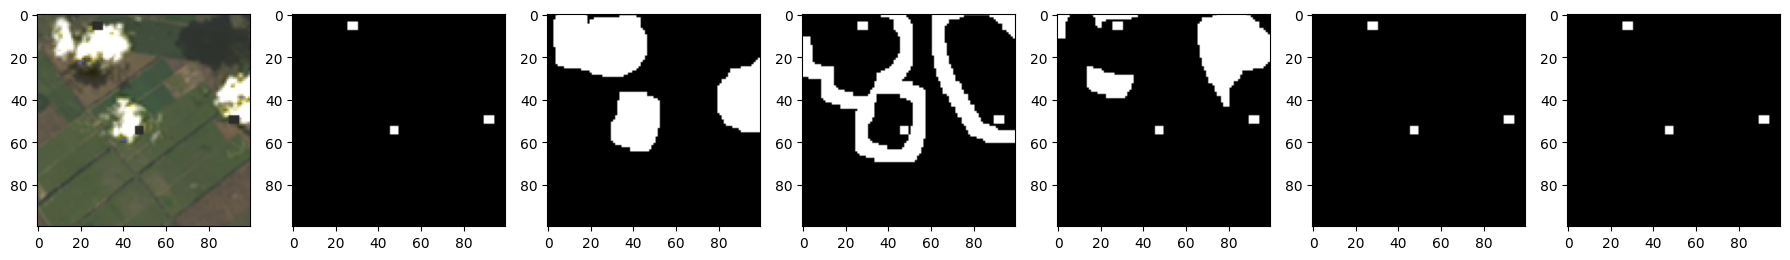

[211]


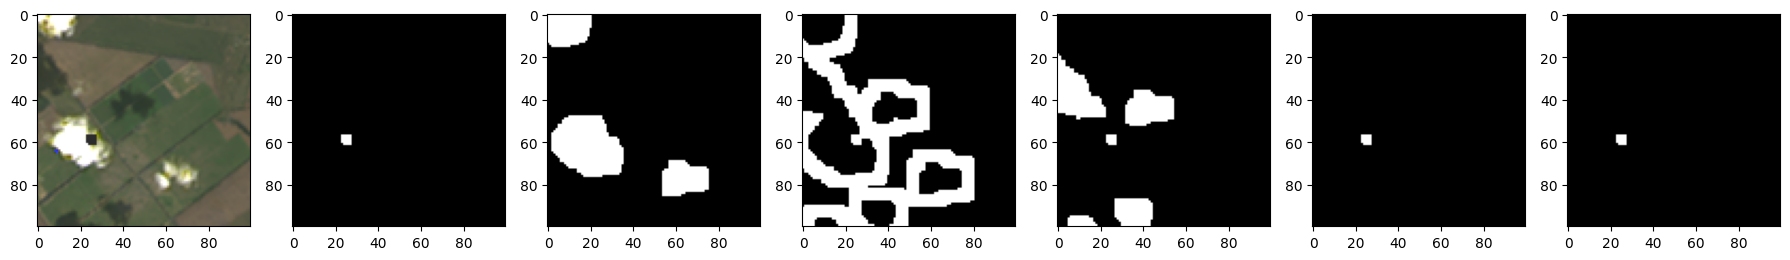

[219]


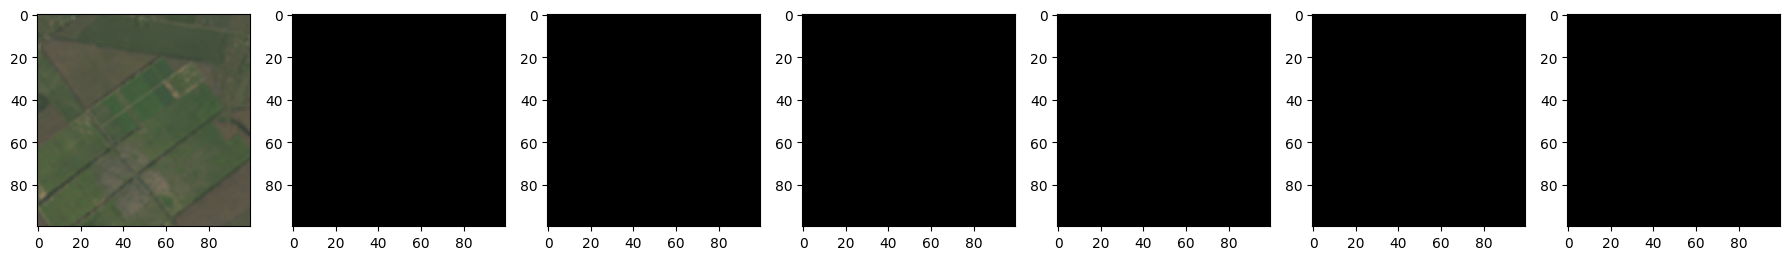

In [ ]:
train_data = data
train_doys = [171, 179, 187, 195, 203, 211, 219]
train_doys = [203, 211, 219]
# train_doys = [219]
# train_data_list = []
otput_data_list = []
for doy in train_doys:
    # data = _get_hls(doy)
    # croped_data = _crop_data(data, doy)
    tr_df = train_data[ train_data['DOY'] == int(doy)].copy()
    otput_data_list.append(tr_df)
    _image_df(tr_df)
    # train_data_list.append(croped_data)
# fn
output_data = pd.concat(otput_data_list, axis=0)
train_data = output_data.copy()

# fn

In [ ]:
final_columns_list = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11', \
                      'cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero', \
                      # 'SAA', 'SZA', 'VAA', 'VZA', \
                      'X', 'Y', 'DOY']

final_columns_list = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', \
                      'cloud', 'adj_cloud', 'cloud_shadow', 'aero', \
                      'SAA', 'SZA', 'VAA', 'VZA', \
                      'X', 'Y', 'DOY']

final_columns_list = ['B01', 'B02', 'B03', 'B04', 'B05', \
                      'cloud', 'adj_cloud', 'cloud_shadow', 'aero', \
                      # 'SAA', 'SZA', 'VAA', 'VZA', \
                      'X', 'Y', 'DOY']

final_columns_list = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'cloud', 'adj_cloud', 'cloud_shadow', 'X', 'Y', 'DOY']
final_columns_list = ['B02', 'B03', 'B04', 'B05', 'cloud', 'adj_cloud', 'cloud_shadow', 'X', 'Y', 'DOY']

train_data = train_data[final_columns_list]
# train_data.columns = final_columns_list

print(train_data.columns.to_list())
display(train_data)

['B02', 'B03', 'B04', 'B05', 'cloud', 'adj_cloud', 'cloud_shadow', 'X', 'Y', 'DOY']


,B02,B03,B04,B05,cloud,adj_cloud,cloud_shadow,X,Y,DOY
40000,435,792,808,2829,0,0,1,1500,925,203
40001,492,842,911,2754,0,0,1,1501,925,203
40002,374,660,673,2509,0,0,1,1502,925,203
40003,289,562,550,2275,0,0,1,1503,925,203
40004,309,566,579,2141,0,0,1,1504,925,203
...,...,...,...,...,...,...,...,...,...,...
69995,338,591,576,1950,0,0,0,1595,1024,219
69996,350,606,577,2002,0,0,0,1596,1024,219
69997,345,597,566,2000,0,0,0,1597,1024,219
69998,348,596,573,2025,0,0,0,1598,1024,219


In [ ]:
#### THIS CELL FOR DEV #############################################
def _get_balanced(input_data, n_train=4, n_test=10):

    def _balanced_sample(indata, N):
        # Specify the desired sample size N
        # N = 4
        data = indata.copy()

        # Calculate the number of 0s and 1s in the DataFrame
        num_zeros = (data[f'Clear'] == '0').sum()
        num_ones  = (data[f'Clear'] == '1').sum()

        # Ensure that N is less than or equal to the minimum of num_zeros and num_ones
        N = min(N, num_zeros, num_ones)

        # Randomly select N/2 samples of 0s and N/2 samples of 1s
        random_zeros = data[data[f'Clear'] == '0'].sample(n=N//2)
        random_ones  = data[data[f'Clear'] == '1'].sample(n=N//2)

        # Concatenate the randomly selected samples to get the final random sample
        balanced_sample = pd.concat([random_zeros, random_ones])
        return balanced_sample

    # Get N random rows from the DataFrame
    data     = _balanced_sample(input_data, n_train)
    # Shuffle the final random sample
    # data = data.sample(frac=1, random_state=42)
    # data = data[columns].loc[0:2].copy()

    val_data = _balanced_sample(input_data, n_test)
    # Shuffle the final random sample
    # val_data = val_data.sample(frac=1, random_state=42)

    return data, val_data

# train_data, test_data = _get_balanced(data, n_train=60, n_test=10)

# final_columns_list = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B09', 'B10', 'B11', \
#                       'cirrus', 'cloud', 'adj_cloud', 'cloud_shadow', 'snow_ice', 'water', 'aero', \
#                       # 'SAA', 'SZA', 'VAA', 'VZA', \
#                       'X', 'Y', 'DOY']

# Replace -9999 with np.nan
train_data.replace(-9999, np.nan, inplace=True)

# Remove rows containing np.nan in any column
train_cleaned = train_data.dropna(how='any')

def _get_ts_pixel(data, doy, clear = 0,):
    # train_data = data.copy()

    # Randomly select N/2 samples of 0s and N/2 samples of 1s
    random_zeros = data.loc[(data[f'cloud'] == clear) & (data[f'adj_cloud'] == clear) & (data[f'cloud_shadow'] == clear) \
                          & (data[f'DOY'] == int(doy))].sample(1)


    print('_get_ts_pixel:', random_zeros.X.values[0], random_zeros.Y.values[0])

    ts_random_zeros = data.loc[(data[f'X'] == random_zeros.X.values[0]) &
                               (data[f'Y'] == random_zeros.Y.values[0])]

    balanced_sample = ts_random_zeros

    return balanced_sample

def _get_xy_pixel(data, X, Y,):

    ts_random_zeros = data.loc[(data[f'X'] == int(X)) &
                               (data[f'Y'] == int(Y))]

    print('_get_xy_pixel:', ts_random_zeros.X.values[0], ts_random_zeros.Y.values[0])

    balanced_sample = ts_random_zeros

    return balanced_sample

balanced_sample = pd.DataFrame()
for ii in range(2):
    balanced_sample = pd.concat([balanced_sample, _get_ts_pixel(train_cleaned, doy = 219, clear = 0)], axis=0)

# for ii in range(2):
#     balanced_sample = pd.concat([balanced_sample, _get_ts_pixel(train_cleaned, doy = 203, clear = 1)], axis=0)


# balanced_sample = pd.DataFrame()
# for ii in range(2):
#     balanced_sample = pd.concat([balanced_sample, _get_xy_pixel(train_cleaned, X = 1550, Y = 1000)], axis=0)

# for ii in range(2):
#     balanced_sample = pd.concat([balanced_sample, _get_xy_pixel(train_cleaned, X = 1550, Y = 1000)], axis=0)
#   # balanced_sample = pd.concat([balanced_sample, _get_ts_pixel(_data, clear = 1)], axis=0)



# fn

# Get the list of row indices
selected_indices = balanced_sample.index.tolist()

print(selected_indices)

# fn

# selected_indices = [5913, 15913, 25913, 35913, 45913, 55913, 65913,
#                     5304, 15304, 25304, 35304, 45304, 55304, \
#                         65304, 4380, 14380, 24380, 34380, 44380, 54380, 64380, 137, 10137, 20137, 30137, 40137, 50137, 60137]

# selected_indices = [44261, 54261, 64261, 48363, 58363, 68363, 40137, 50137, 60137, 42935, 52935, 62935]

print('interchange:', selected_indices)

# Create a new DataFrame with the selected indices
balanced_sample = train_cleaned.loc[selected_indices]

# final_columns_token_list = ['A', 'B', 'C', 'D', 'E', \
#                             'F', 'G', 'H', 'I', \
#                           # 'SAA', 'SZA', 'VAA', 'VZA', \
#                             'G', 'K', 'L']

# # Replace the column names
# balanced_sample.columns = final_columns_token_list
# display(balanced_sample)
#### FOR CLEARED DATASET ########################
balanced_sample = train_cleaned.copy()

###### GET CLEAR PIXELS ONLY ###########################
def _get_clear(data):
    cleared_data = data.loc[(data[f'cloud'] == 0) & (data[f'adj_cloud'] == 0) & (data[f'cloud_shadow'] == 0)].copy()
    return cleared_data

train_cleared = _get_clear(balanced_sample)
balanced_sample = train_cleared.copy()
########################################################
# Delete the specified columns
balanced_sample = balanced_sample.drop(columns=['cloud', 'adj_cloud', 'cloud_shadow'], axis=1)

# Reset the index to remove it
balanced_sample = balanced_sample.reset_index(drop=True)

final_columns_list = ['B02', 'B03', 'B04', 'B05', 'X', 'Y', 'DOY']
balanced_sample.columns = final_columns_list

display(balanced_sample)

_get_ts_pixel: 1594 975
_get_ts_pixel: 1585 1012
[55094, 65094, 48785, 58785, 68785]
interchange: [55094, 65094, 48785, 58785, 68785]


,B02,B03,B04,B05,X,Y,DOY
0,382.0,687.0,639.0,3072.0,1549,925,203
1,352.0,684.0,554.0,3259.0,1550,925,203
2,283.0,587.0,483.0,2920.0,1551,925,203
3,286.0,567.0,478.0,2696.0,1552,925,203
4,315.0,578.0,496.0,3012.0,1553,925,203
...,...,...,...,...,...,...,...
20360,338.0,591.0,576.0,1950.0,1595,1024,219
20361,350.0,606.0,577.0,2002.0,1596,1024,219
20362,345.0,597.0,566.0,2000.0,1597,1024,219
20363,348.0,596.0,573.0,2025.0,1598,1024,219


In [ ]:
train_data = balanced_sample.copy() #[0:1000]

# display(train_data)

table_dtype = 'int16'

train_data = train_data.astype(table_dtype)
print(train_data.dtypes.tolist())

# Reset the index to remove it
train_data = train_data.reset_index(drop=True)

train_data.columns = final_columns_list

display(train_data)

# #### FOR CPU USABILITY, for 2 pixels #################################
# epochs_steps = 1  # 250 #50
# save_steps = 1   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 1 # 250 #25 #9380  #1000

#### FOR V-100 GPU USABILITY################################
epochs_steps = 400   # 250 #50
save_steps = 5000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 200 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################

# #### FOR A-100 GPU USABILITY################################
# epochs_steps = 800   # 250 #50
# save_steps = 10000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 500 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 800 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################

EXP_NAME = 'exp-A100'
EXP_NAME = 'exp-V100'
EXP_NAME = 'exp-T4'

#### 1 ###########
# learning_rate = 5e-5
# lr_scheduler_type = 'constant' # constant_with_warmup

learning_rate = 0.001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'

##### SET experiment_dir for the first run #############
experiment_dir = f"{EXP_NAME}/RGBN{table_dtype}_lr{learning_rate}_{lr_scheduler_type}"

##### SET experiment_dir & efficient_finetuning #######################
efficient_finetuning = ''  #'lora'
if efficient_finetuning == 'lora':
    experiment_dir = f"{EXP_NAME}/{experiment_dir}_{efficient_finetuning}"

#### SET model_save_dir through save_model #########################
# model_save_dir = f'{EXP_NAME}/ZeroModel_{efficient_finetuning}'


TRAINER_RUN = 1
if TRAINER_RUN == 0:
  load_model_path = 'distilgpt2'
  experiment_dir = f'{experiment_dir}_run[{TRAINER_RUN}]'
elif TRAINER_RUN == 1:
  load_model_path = f'{experiment_dir}_run[{TRAINER_RUN-1}]/checkpoint-45000'
  experiment_dir  = f'{experiment_dir}_run[{TRAINER_RUN}]'

#############################
# learning_rate = learning_rate / 2
# lr_scheduler_type = 'constant'
##########################

# experiment_dir = './input/chkpoint/' + experiment_dir
print('experiment_dir:', experiment_dir)


model = GReaT(llm=load_model_path,
              batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
              # dataloader_num_workers=2, #fp16=True,
              save_total_limit=2,
              prediction_loss_only=True,
              experiment_dir=f'{experiment_dir}',
              dataloader_num_workers=2,
              efficient_finetuning = efficient_finetuning,
              learning_rate=learning_rate,
              lr_scheduler_type=lr_scheduler_type,
              warmup_ratio=0.25,
              # optim='adamw_torch_fused',
              fp16 = True,
              # torch_compile=True,
              # bf16=True,
              # warmup_steps=1500,
              # lr_scheduler_type='cosine_with_restarts',
              #torch_compile=True, bf16=True,  #optim='adamw_torch_fused',#auto_find_batch_size=True,
              # use_cpu=True, # fp16 = True, #fp16_opt_level='O3', #half_precision_backend='auto',
              )

print(model.model)
# fn

model.fit(train_data[0:1000])

In [ ]:
fn

In [ ]:
# model_load_dir = f'./{EXP_NAME}' #+'_FST0'
# model_save_dir = f'./{EXP_NAME}'

train_data = balanced_sample.copy() #[0:1000]

# display(train_data)

table_dtype = 'int16'

train_data = train_data.astype(table_dtype)
print(train_data.dtypes.tolist())

# Reset the index to remove it
train_data = train_data.reset_index(drop=True)

train_data.columns = final_columns_list

display(train_data)
# fn

# # train_data = train_data_.sample(frac=1.0) #.reset_index(inplace=True)
# # Generate a random state based on CPU time
# current_time = int(time.time())
# random_state = current_time % (2**32)  # Use the current time as the seed (limit to 32 bits)
# # Shuffle the DataFrame using the generated random state
# train_data_shuffled = sklearn.utils.shuffle(train_data_, random_state=random_state)
# train_data = train_data_shuffled.copy()

# #### FOR CPU USABILITY, for 2 pixels #################################
# epochs_steps = 1  # 250 #50
# save_steps = 1   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 1 # 250 #25 #9380  #1000

#### FOR V-100 GPU USABILITY################################
epochs_steps = 400   # 250 #50
save_steps = 5000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 200 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################

# #### FOR A-100 GPU USABILITY################################
# epochs_steps = 800   # 250 #50
# save_steps = 10000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 500 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 800 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################


# ALL_EPOCHS = 150000
# checkpoint_id = f'{1}'

EXP_NAME = 'exp-A100'
EXP_NAME = 'exp-V100'

#### 1 ###########
# learning_rate = 5e-5
# lr_scheduler_type = 'constant' # constant_with_warmup

learning_rate = 0.001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'

# experiment_dir = "trainer_RGB_float64"

# calc_device = 'V-100'

experiment_dir = f"{EXP_NAME}/trainer_RGB_{table_dtype}_lr{learning_rate}_{lr_scheduler_type}"

efficient_finetuning = ''  #'lora'
if efficient_finetuning == 'lora':
    experiment_dir = f"{EXP_NAME}/{experiment_dir}_{efficient_finetuning}"

model_save_dir = f'{EXP_NAME}/ZeroModel_{efficient_finetuning}'

load_model_path = f'{experiment_dir}/checkpoint-45000'

#############################
learning_rate = learning_rate / 2
lr_scheduler_type = 'constant'
##########################

# experiment_dir = './input/chkpoint/' + experiment_dir
print('experiment_dir:', experiment_dir)

FIRST_START = 0

icount = 1
while (FIRST_START < 2):
    if FIRST_START == 0:
        print('First start...')
        model = GReaT(llm=load_model_path,
                      batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
                      # dataloader_num_workers=2, #fp16=True,
                      save_total_limit=2,
                      prediction_loss_only=True,
                      experiment_dir=f'{experiment_dir}_1',
                      dataloader_num_workers=2,
                      efficient_finetuning = efficient_finetuning,
                      learning_rate=learning_rate,
                      lr_scheduler_type=lr_scheduler_type,
                      warmup_ratio=0.25,
                      # optim='adamw_torch_fused',
                      fp16 = True,
                      # torch_compile=True,
                      # bf16=True,
                      # warmup_steps=1500,
                      # lr_scheduler_type='cosine_with_restarts',
                      #torch_compile=True, bf16=True,  #optim='adamw_torch_fused',#auto_find_batch_size=True,
                      # use_cpu=True, # fp16 = True, #fp16_opt_level='O3', #half_precision_backend='auto',
                      )

        print(model.model)
        # fn

        model.fit(train_data)
        # model.save(model_save_dir+'_FST0')

        # Create a zip archive of the folder
        # shutil.make_archive(model_save_dir+'_FST0', 'zip', model_save_dir)

        FIRST_START = 1
        icount = icount + 1
        fn
    elif FIRST_START == 1:
        print(f'Resume_from_checkpoint checkpoint:{experiment_dir}...')
        # f'./trainer_great/checkpoint-{checkpoint_id}
        model = GReaT(llm='distilgpt2',
                      batch_size=batch_size, epochs=icount*epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
                      # dataloader_num_workers=2, #fp16=True,
                      save_total_limit=2,
                      prediction_loss_only=True,
                      experiment_dir=experiment_dir,
                      dataloader_num_workers=2,
                      efficient_finetuning = efficient_finetuning,
                      learning_rate=learning_rate,
                      lr_scheduler_type=lr_scheduler_type,
                      warmup_ratio=0.25,
                      # optim='adamw_torch_fused',
                      fp16 = True,
                      # torch_compile=True,
                      # bf16=True,
                      # warmup_steps=1500,
                      # lr_scheduler_type='cosine_with_restarts',
                      #torch_compile=True, bf16=True,  #optim='adamw_torch_fused',#auto_find_batch_size=True,
                      # use_cpu=True, # fp16 = True, #fp16_opt_level='O3', #half_precision_backend='auto',
                      )

        icount = icount + 1

        model.fit(train_data, resume_from_checkpoint=True)

        model.save(model_save_dir)

        # Create a zip archive of the folder
        shutil.make_archive(model_save_dir, 'zip', model_save_dir)

        if  (icount > 300):
            FIRST_START = 2


[dtype('int16'), dtype('int16'), dtype('int16'), dtype('int16'), dtype('int16'), dtype('int16'), dtype('int16')]


,B02,B03,B04,B05,X,Y,DOY
0,382,687,639,3072,1549,925,203
1,352,684,554,3259,1550,925,203
2,283,587,483,2920,1551,925,203
3,286,567,478,2696,1552,925,203
4,315,578,496,3012,1553,925,203
...,...,...,...,...,...,...,...
20360,338,591,576,1950,1595,1024,219
20361,350,606,577,2002,1596,1024,219
20362,345,597,566,2000,1597,1024,219
20363,348,596,573,2025,1598,1024,219


experiment_dir: exp-V100/trainer_RGB_int16_lr0.001_constant_with_warmup
First start...
GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


Step,Training Loss
200,0.551000
400,0.545300
600,0.543300
800,0.542100
1000,0.540700
1200,0.539700
1400,0.540100
1600,0.539000
1800,0.537800
2000,0.537600


In [ ]:
# model_load_dir = f'./{EXP_NAME}' #+'_FST0'
# model_save_dir = f'./{EXP_NAME}'

train_data = balanced_sample.copy() #[0:1000]

# display(train_data)

table_dtype = 'int16'

train_data = train_data.astype(table_dtype)
print(train_data.dtypes.tolist())

# Reset the index to remove it
train_data = train_data.reset_index(drop=True)

train_data.columns = final_columns_list

display(train_data)
# fn

# # train_data = train_data_.sample(frac=1.0) #.reset_index(inplace=True)
# # Generate a random state based on CPU time
# current_time = int(time.time())
# random_state = current_time % (2**32)  # Use the current time as the seed (limit to 32 bits)
# # Shuffle the DataFrame using the generated random state
# train_data_shuffled = sklearn.utils.shuffle(train_data_, random_state=random_state)
# train_data = train_data_shuffled.copy()

# #### FOR CPU USABILITY, for 2 pixels #################################
# epochs_steps = 1  # 250 #50
# save_steps = 1   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 1 # 250 #25 #9380  #1000

#### FOR V-100 GPU USABILITY################################
epochs_steps = 400   # 250 #50
save_steps = 5000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
logging_steps = 200 # 250 #25 #9380  #1000
#### batch_size = 250 for T4
batch_size = 232 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
#######################################

# #### FOR A-100 GPU USABILITY################################
# epochs_steps = 800   # 250 #50
# save_steps = 10000   #250 #50 #9380  #2000   # FOR FIT THIS VALUE START TRAIN DATASET, EQUALS FOR STEPS IN FIRST START
# logging_steps = 500 # 250 #25 #9380  #1000
# #### batch_size = 250 for T4
# batch_size = 800 #250 #312  # 224 # 250 #300 #164 for float64 # 112 # for float64 # 136 # 96   # 140# 400
# #######################################


# ALL_EPOCHS = 150000
# checkpoint_id = f'{1}'

EXP_NAME = 'exp-A100'
EXP_NAME = 'exp-V100'

#### 1 ###########
# learning_rate = 5e-5
# lr_scheduler_type = 'constant' # constant_with_warmup

learning_rate = 0.001
lr_scheduler_type = 'cosine_with_restarts'
lr_scheduler_type = 'constant_with_warmup'

# experiment_dir = "trainer_RGB_float64"

# calc_device = 'V-100'

experiment_dir = f"{EXP_NAME}/trainer_RGB_{table_dtype}_lr{learning_rate}_{lr_scheduler_type}"

efficient_finetuning = ''  #'lora'
if efficient_finetuning == 'lora':
    experiment_dir = f"{EXP_NAME}/{experiment_dir}_{efficient_finetuning}"

model_save_dir = f'{EXP_NAME}/ZeroModel_{efficient_finetuning}'

# experiment_dir = './input/chkpoint/' + experiment_dir
# print('experiment_dir:', experiment_dir)

FIRST_START = 0

icount = 1
while (FIRST_START < 2):
    if FIRST_START == 0:
        print('First start...')
        model = GReaT(llm='distilgpt2',
                      batch_size=batch_size, epochs=epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
                      # dataloader_num_workers=2, #fp16=True,
                      save_total_limit=2,
                      prediction_loss_only=True,
                      experiment_dir=experiment_dir,
                      dataloader_num_workers=2,
                      efficient_finetuning = efficient_finetuning,
                      learning_rate=learning_rate,
                      lr_scheduler_type=lr_scheduler_type,
                      warmup_ratio=0.25,
                      # optim='adamw_torch_fused',
                      fp16 = True,
                      # torch_compile=True,
                      # bf16=True,
                      # warmup_steps=1500,
                      # lr_scheduler_type='cosine_with_restarts',
                      #torch_compile=True, bf16=True,  #optim='adamw_torch_fused',#auto_find_batch_size=True,
                      # use_cpu=True, # fp16 = True, #fp16_opt_level='O3', #half_precision_backend='auto',
                      )

        print(model.model)
        # fn

        model.fit(train_data)
        model.save(model_save_dir+'_FST0')

        # Create a zip archive of the folder
        shutil.make_archive(model_save_dir+'_FST0', 'zip', model_save_dir)

        FIRST_START = 1
        icount = icount + 1
    elif FIRST_START == 1:
        print(f'Resume_from_checkpoint checkpoint:{experiment_dir}...')
        # f'./trainer_great/checkpoint-{checkpoint_id}
        model = GReaT(llm='distilgpt2',
                      batch_size=batch_size, epochs=icount*epochs_steps, logging_steps=logging_steps, save_steps=save_steps,
                      # dataloader_num_workers=2, #fp16=True,
                      save_total_limit=2,
                      prediction_loss_only=True,
                      experiment_dir=experiment_dir,
                      dataloader_num_workers=2,
                      efficient_finetuning = efficient_finetuning,
                      learning_rate=learning_rate,
                      lr_scheduler_type=lr_scheduler_type,
                      warmup_ratio=0.25,
                      # optim='adamw_torch_fused',
                      fp16 = True,
                      # torch_compile=True,
                      # bf16=True,
                      # warmup_steps=1500,
                      # lr_scheduler_type='cosine_with_restarts',
                      #torch_compile=True, bf16=True,  #optim='adamw_torch_fused',#auto_find_batch_size=True,
                      # use_cpu=True, # fp16 = True, #fp16_opt_level='O3', #half_precision_backend='auto',
                      )

        icount = icount + 1

        model.fit(train_data, resume_from_checkpoint=True)

        model.save(model_save_dir)

        # Create a zip archive of the folder
        shutil.make_archive(model_save_dir, 'zip', model_save_dir)

        if  (icount > 300):
            FIRST_START = 2
